<a href="https://colab.research.google.com/github/anushkarai26/phishing_url_detection_ml/blob/main/phishing_website_detection_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# metadata
print(phishing_websites.metadata)

# variable information
print(phishing_websites.variables)


{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

In [ ]:
# Check the first few rows of the dataset
print(X.head())
print(y.head())

# Check for missing values
print("Missing values in X:\n", X.isnull().sum())
print("Missing values in y:\n", y.isnull().sum())

# Check the distribution of target classes
print("Target class distribution:\n", y.value_counts())


   having_ip_address  url_length  shortining_service  having_at_symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  prefix_suffix  having_sub_domain  sslfinal_state  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   domain_registration_length  favicon  ...  rightclick  popupwindow

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (8844, 30)
Testing set size: (2211, 30)


lightgbm

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Initialize the LightGBM classifier
model = LGBMClassifier(
    boosting_type='gbdt',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=31,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {acc_train:.3f}")
print(f"Testing Accuracy: {acc_test:.3f}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 4926, number of negative: 3918
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8844, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556988 -> initscore=0.228946
[LightGBM] [Info] Start training from score 0.228946
Training Accuracy: 0.982
Testing Accuracy: 0.972


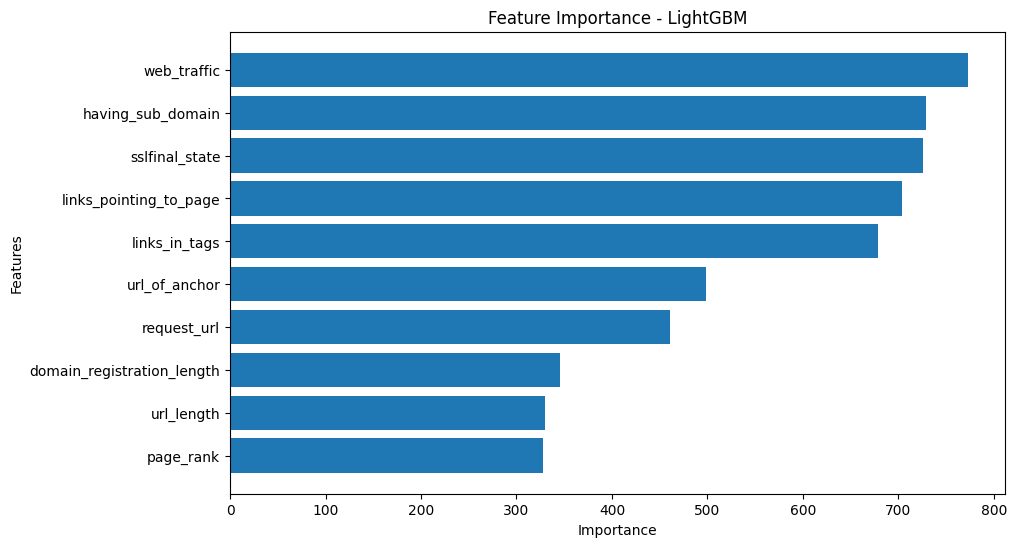

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the LightGBM model
importances_lgbm = model.feature_importances_

# Sort the features by importance
indices_lgbm = np.argsort(importances_lgbm)[::-1]  # Sort in descending order

# Create a plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - LightGBM")
plt.barh(range(10), importances_lgbm[indices_lgbm[:10]], align="center")
plt.yticks(range(10), X_train.columns[indices_lgbm[:10]])  # Assuming X_train has column names
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


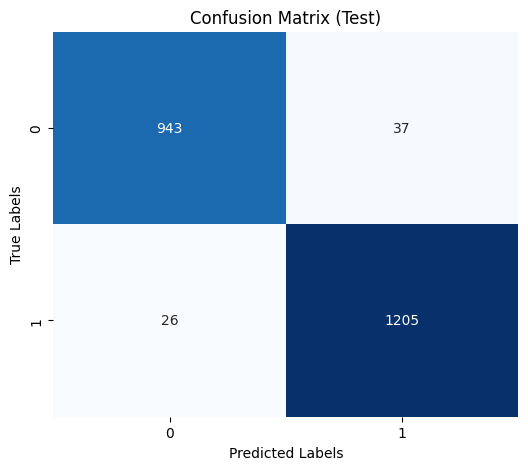

Classification Report (Test):
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       980
           1       0.97      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Testing Accuracy: 0.972


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Plot confusion matrix for the test dataset
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_test_pred, "Confusion Matrix (Test)")

# Print detailed metrics for the test set
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Calculate accuracy
acc_test = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {acc_test:.3f}")

In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_recall_fscore_support

# Calculate single final metric values
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_test_pred, average='macro'  # Use 'macro' for unweighted average across classes
)

# Print final metric values
print(f"Final Precision (Macro Avg): {precision:.3f}")
print(f"Final Recall (Macro Avg): {recall:.3f}")
print(f"Final F1-Score (Macro Avg): {f1:.3f}")


Final Precision (Macro Avg): 0.972
Final Recall (Macro Avg): 0.971
Final F1-Score (Macro Avg): 0.972


xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
# Convert the target variable to a Series if it's not already
y = y.squeeze()  # Converts a DataFrame with one column to a Series

# Transform the target variable to have values 0 and 1
y = y.replace({-1: 0, 1: 1})  # Replace -1 with 0

# Verify the transformation
print("Unique values in y after transformation:", y.unique())

# Split the data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Initialize the XGBoost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(
    n_estimators=200,      # Number of trees
    learning_rate=0.1,     # Step size shrinkage
    max_depth=5,           # Maximum depth of a tree
    random_state=42,       # Random state for reproducibility
    use_label_encoder=False,  # Suppress warning for newer XGBoost versions
    eval_metric='logloss'     # Evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

Unique values in y after transformation: [0 1]
Training set size: (8844, 30)
Testing set size: (2211, 30)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:41:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.977
Testing Accuracy: 0.972


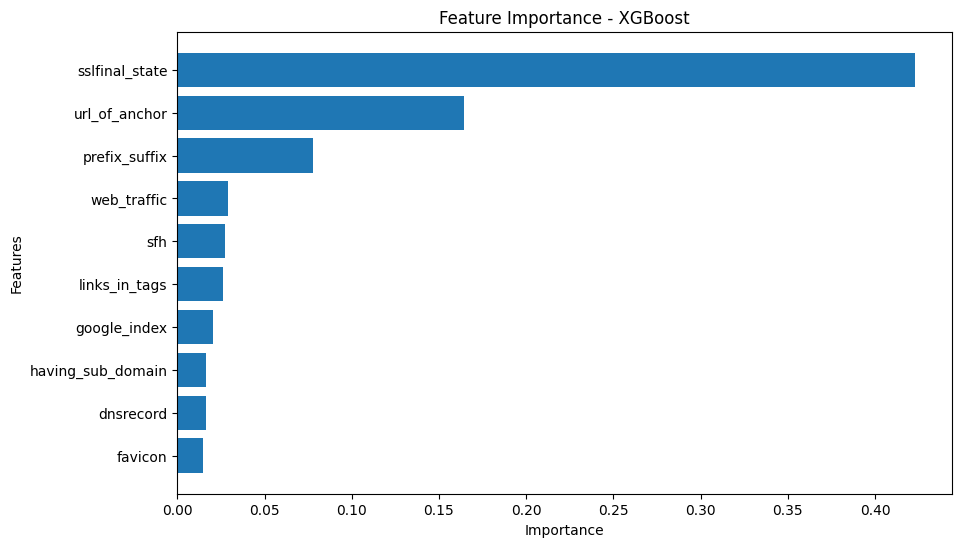

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the XGBoost model
importances_xgb = xgb_model.feature_importances_

# Sort the features by importance
indices_xgb = np.argsort(importances_xgb)[::-1]  # Sort in descending order

# Create a plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - XGBoost")
plt.barh(range(10), importances_xgb[indices_xgb[:10]], align="center")
plt.yticks(range(10), X_train.columns[indices_xgb[:10]])  # Assuming X_train has column names
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


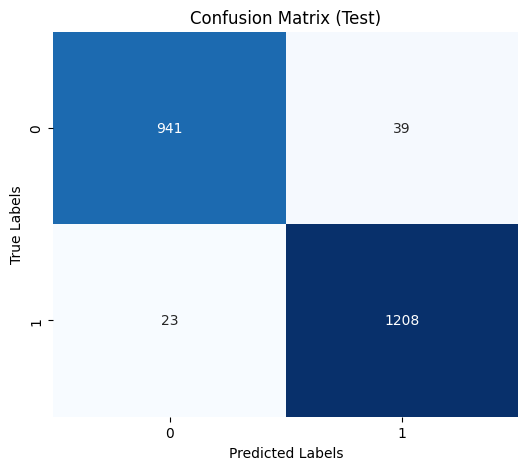

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.97      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Testing Accuracy: 0.972


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Plot confusion matrix for the test dataset
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_test_pred, "Confusion Matrix (Test)")

# Print classification report for the test set
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.3f}")


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate final metrics
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_test_pred, average='macro'  # Use 'macro' for unweighted averages across classes
)

# Print final metric values
print(f"Final Precision (Macro Avg): {precision:.3f}")
print(f"Final Recall (Macro Avg): {recall:.3f}")
print(f"Final F1-Score (Macro Avg): {f1:.3f}")

Final Precision (Macro Avg): 0.972
Final Recall (Macro Avg): 0.971
Final F1-Score (Macro Avg): 0.972


random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf:.3f}")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.3f}")

Random Forest Training Accuracy: 0.958
Random Forest Testing Accuracy: 0.957


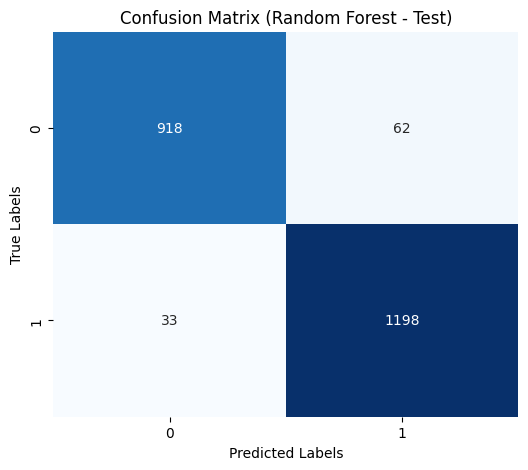

Classification Report (Random Forest - Test):
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       980
           1       0.95      0.97      0.96      1231

    accuracy                           0.96      2211
   macro avg       0.96      0.95      0.96      2211
weighted avg       0.96      0.96      0.96      2211

Random Forest Testing Accuracy: 0.957


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Plot the confusion matrix for test data
plot_confusion_matrix(y_test, y_test_pred_rf, "Confusion Matrix (Random Forest - Test)")

# Print the classification report for the test set
print("Classification Report (Random Forest - Test):")
print(classification_report(y_test, y_test_pred_rf))

# Print test accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.3f}")


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate final metrics
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(
    y_test, y_test_pred_rf, average='macro'  # Use 'macro' for unweighted averages across classes
)

# Print final metric values
print(f"Random Forest Final Precision (Macro Avg): {precision_rf:.3f}")
print(f"Random Forest Final Recall (Macro Avg): {recall_rf:.3f}")
print(f"Random Forest Final F1-Score (Macro Avg): {f1_rf:.3f}")

Random Forest Final Precision (Macro Avg): 0.958
Random Forest Final Recall (Macro Avg): 0.955
Random Forest Final F1-Score (Macro Avg): 0.956


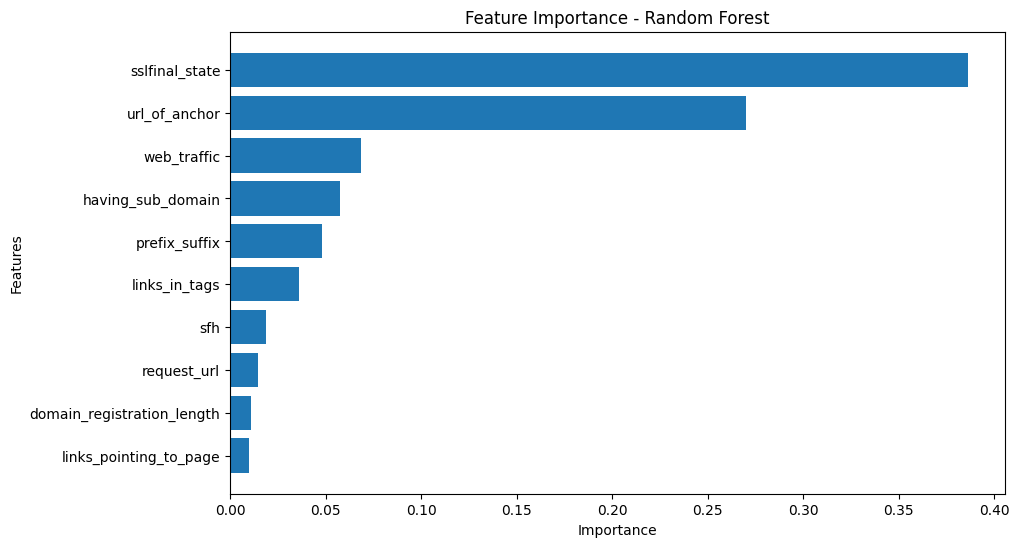

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the features by importance

# Create a plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.barh(range(10), importances[indices[:10]], align="center")
plt.yticks(range(10), X_train.columns[indices[:10]])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


svm

In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM Training Accuracy: {train_accuracy_svm:.3f}")
print(f"SVM Testing Accuracy: {test_accuracy_svm:.3f}")

SVM Training Accuracy: 0.953
SVM Testing Accuracy: 0.949


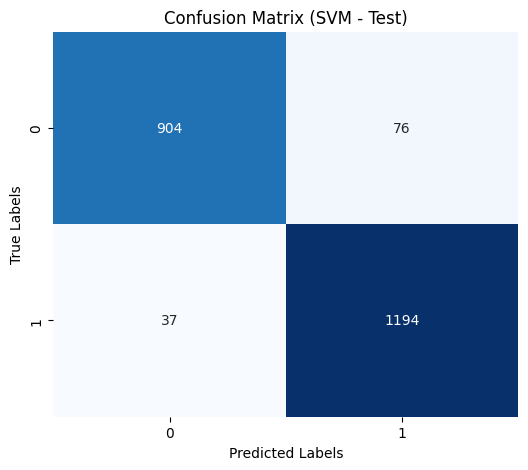

Classification Report (SVM - Test):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       980
           1       0.94      0.97      0.95      1231

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211

SVM Testing Accuracy: 0.949


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Plot the confusion matrix for test data
plot_confusion_matrix(y_test, y_test_pred_svm, "Confusion Matrix (SVM - Test)")

# Print the classification report for the test set
print("Classification Report (SVM - Test):")
print(classification_report(y_test, y_test_pred_svm))

# Print test accuracy
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Testing Accuracy: {test_accuracy_svm:.3f}")


In [ ]:
# Get classification report metrics (macro average precision, recall, f1)
report = classification_report(y_test, y_test_pred_svm, output_dict=True)
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# Print the macro-averaged metrics
print(f"Macro Average Precision: {macro_precision:.3f}")
print(f"Macro Average Recall: {macro_recall:.3f}")
print(f"Macro Average F1-Score: {macro_f1:.3f}")


Macro Average Precision: 0.950
Macro Average Recall: 0.946
Macro Average F1-Score: 0.948


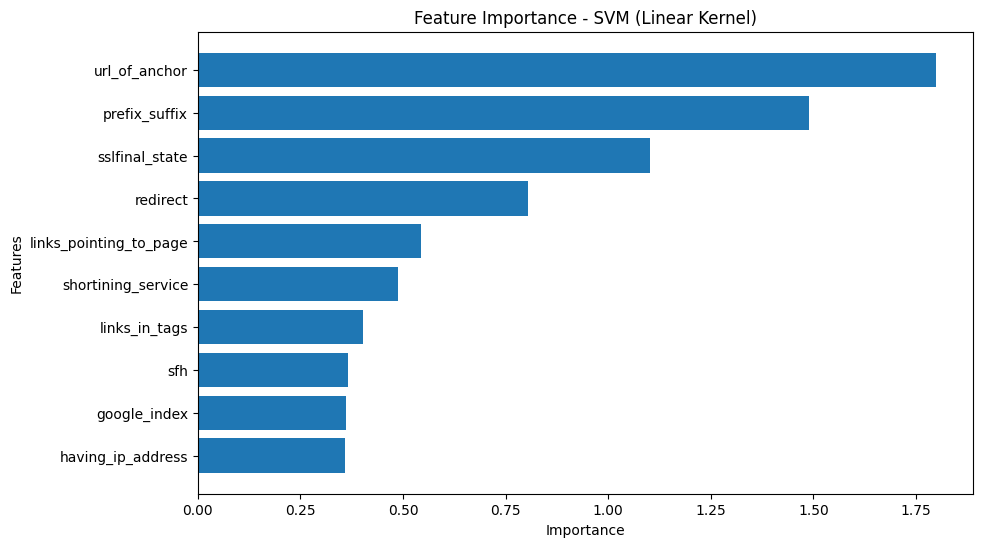

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Initialize SVM model with a linear kernel for feature importance interpretation
svm_model_linear = SVC(kernel='linear', C=1, random_state=42)

# Train the model
svm_model_linear.fit(X_train, y_train)

# Get feature importance from the coefficients
importances_svm = np.abs(svm_model_linear.coef_.flatten())  # Absolute values of coefficients
indices_svm = np.argsort(importances_svm)[::-1]  # Sort the features by importance

# Create a plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - SVM (Linear Kernel)")
plt.barh(range(10), importances_svm[indices_svm[:10]], align="center")
plt.yticks(range(10), X_train.columns[indices_svm[:10]])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=500, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict
y_train_pred_logreg = logreg_model.predict(X_train)
y_test_pred_logreg = logreg_model.predict(X_test)

# Accuracy
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)

print(f"Logistic Regression Training Accuracy: {train_accuracy_logreg:.3f}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_logreg:.3f}")


Logistic Regression Training Accuracy: 0.928
Logistic Regression Testing Accuracy: 0.929


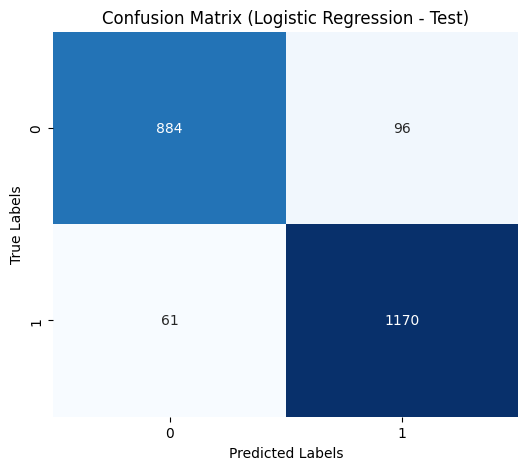

Classification Report (Logistic Regression - Test):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       980
           1       0.92      0.95      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

Logistic Regression Testing Accuracy: 0.929


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Plot the confusion matrix for test data
plot_confusion_matrix(y_test, y_test_pred_logreg, "Confusion Matrix (Logistic Regression - Test)")

# Print the classification report for the test set
print("Classification Report (Logistic Regression - Test):")
print(classification_report(y_test, y_test_pred_logreg))

# Print test accuracy
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print(f"Logistic Regression Testing Accuracy: {test_accuracy_logreg:.3f}")

In [ ]:
# Get classification report metrics (macro average precision, recall, f1)
report_logreg = classification_report(y_test, y_test_pred_logreg, output_dict=True)
macro_precision_logreg = report_logreg['macro avg']['precision']
macro_recall_logreg = report_logreg['macro avg']['recall']
macro_f1_logreg = report_logreg['macro avg']['f1-score']

# Print the macro-averaged metrics
print(f"Macro Average Precision (Logistic Regression): {macro_precision_logreg:.3f}")
print(f"Macro Average Recall (Logistic Regression): {macro_recall_logreg:.3f}")
print(f"Macro Average F1-Score (Logistic Regression): {macro_f1_logreg:.3f}")


Macro Average Precision (Logistic Regression): 0.930
Macro Average Recall (Logistic Regression): 0.926
Macro Average F1-Score (Logistic Regression): 0.928


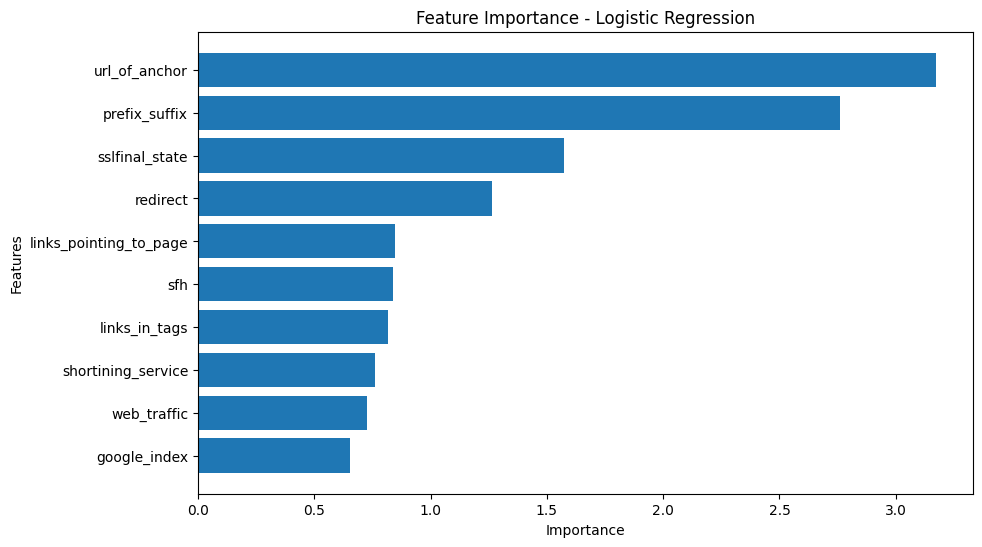

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=500, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Get feature importance from the coefficients (absolute values)
importances_logreg = np.abs(logreg_model.coef_.flatten())  # Absolute values of coefficients
indices_logreg = np.argsort(importances_logreg)[::-1]  # Sort the features by importance

# Create a plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Logistic Regression")
plt.barh(range(10), importances_logreg[indices_logreg[:10]], align="center")
plt.yticks(range(10), X_train.columns[indices_logreg[:10]])  # Assuming X_train has column names
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


adabost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize base learner (a weak learner, e.g., Decision Tree)
base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=base_learner,  # Use 'estimator' instead of 'base_estimator'
    n_estimators=200,
    learning_rate=1.0,
    random_state=42
)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict
y_train_pred_adaboost = adaboost_model.predict(X_train)
y_test_pred_adaboost = adaboost_model.predict(X_test)

# Accuracy
train_accuracy_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
test_accuracy_adaboost = accuracy_score(y_test, y_test_pred_adaboost)

print(f"AdaBoost Training Accuracy: {train_accuracy_adaboost:.3f}")
print(f"AdaBoost Testing Accuracy: {test_accuracy_adaboost:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Training Accuracy: 0.937
AdaBoost Testing Accuracy: 0.938


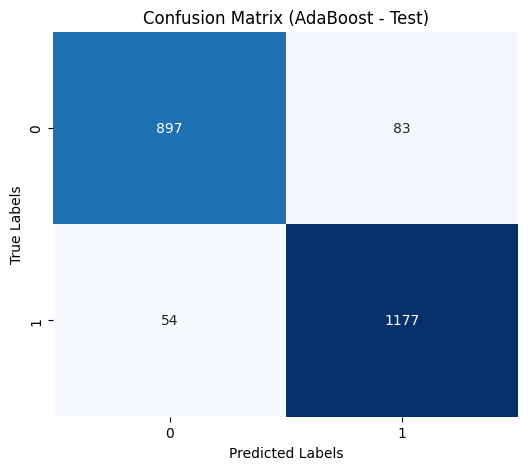

Classification Report (AdaBoost - Test):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       980
           1       0.93      0.96      0.95      1231

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211

AdaBoost Testing Accuracy: 0.938


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Plot the confusion matrix for test data
plot_confusion_matrix(y_test, y_test_pred_adaboost, "Confusion Matrix (AdaBoost - Test)")

# Print the classification report for the test set
print("Classification Report (AdaBoost - Test):")
print(classification_report(y_test, y_test_pred_adaboost))

# Print test accuracy
test_accuracy_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
print(f"AdaBoost Testing Accuracy: {test_accuracy_adaboost:.3f}")

In [ ]:
# Get classification report metrics (macro average precision, recall, f1)
report_adaboost = classification_report(y_test, y_test_pred_adaboost, output_dict=True)
macro_precision_adaboost = report_adaboost['macro avg']['precision']
macro_recall_adaboost = report_adaboost['macro avg']['recall']
macro_f1_adaboost = report_adaboost['macro avg']['f1-score']

# Print the macro-averaged metrics
print(f"Macro Average Precision (AdaBoost): {macro_precision_adaboost:.3f}")
print(f"Macro Average Recall (AdaBoost): {macro_recall_adaboost:.3f}")
print(f"Macro Average F1-Score (AdaBoost): {macro_f1_adaboost:.3f}")

Macro Average Precision (AdaBoost): 0.939
Macro Average Recall (AdaBoost): 0.936
Macro Average F1-Score (AdaBoost): 0.937


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


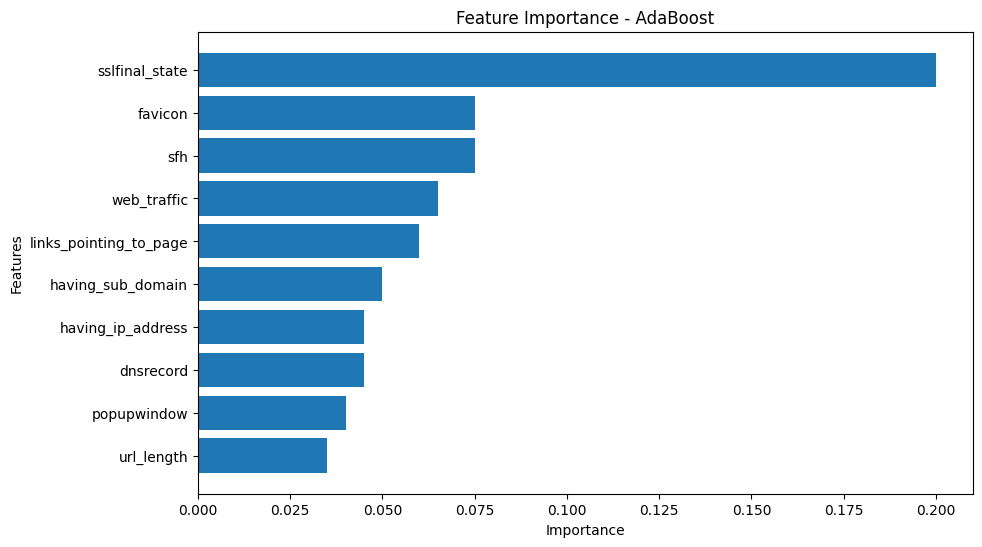

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize base learner (a weak learner, e.g., Decision Tree)
base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=base_learner,  # Use 'estimator' instead of 'base_estimator'
    n_estimators=200,
    learning_rate=1.0,
    random_state=42
)

# Train the model
adaboost_model.fit(X_train, y_train)

# Get feature importance from the AdaBoost model
importances_adaboost = adaboost_model.feature_importances_

# Sort the features by importance
indices_adaboost = np.argsort(importances_adaboost)[::-1]  # Sort in descending order

# Create a plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - AdaBoost")
plt.barh(range(10), importances_adaboost[indices_adaboost[:10]], align="center")
plt.yticks(range(10), X_train.columns[indices_adaboost[:10]])  # Assuming X_train has column names
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()